In [2]:
# using pandas with matplotlib

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Ankit\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset('lukebarousse/data_jobs')
df =  dataset['train'].to_pandas()

In [4]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

<Axes: xlabel='job_posted_month'>

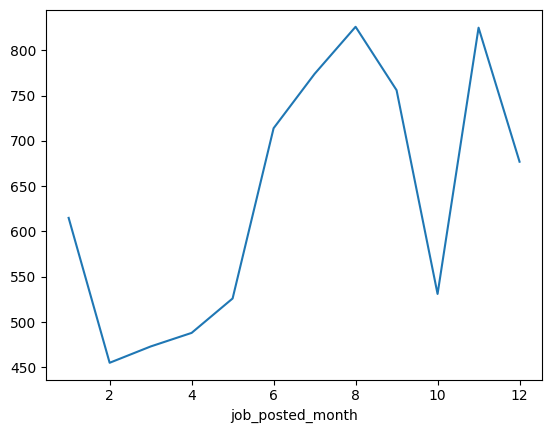

In [5]:
df['job_posted_month'] = df['job_posted_date'].dt.month
job_by_months = df[df['job_location']=='India']['job_posted_month'].value_counts().sort_index()
job_by_months.plot(kind='line')

job_title_short
Cloud Engineer                12331
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Scientist         36957
Senior Data Engineer          44563
Software Engineer             44929
Business Analyst              49063
Data Scientist               172286
Data Engineer                186241
Data Analyst                 196075
Name: count, dtype: int64


<Axes: ylabel='job_title_short'>

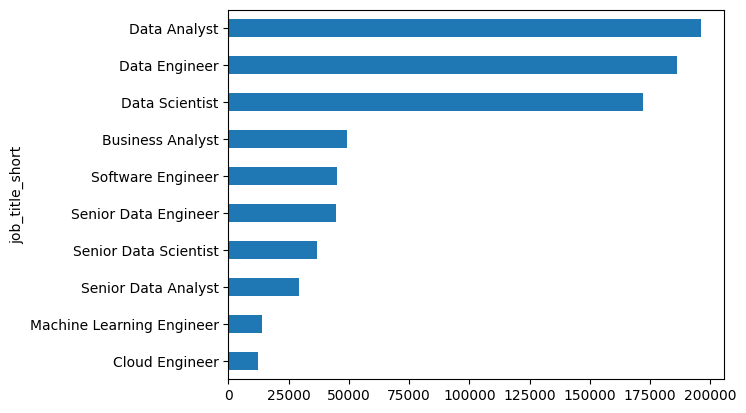

In [6]:
job_counts = df['job_title_short'].value_counts(ascending=True)
print(job_counts)
job_counts.plot(kind='barh')

In [7]:
# job posted on 2024 trends

df = df[['job_posted_date', 'job_posted_month','salary_year_avg']].dropna(subset = ['salary_year_avg']).sort_values(['job_posted_date'])
